# Visualization of the dataset

In [2]:
import json
import os
import random
from IPython.display import display
from PIL import Image, ImageDraw
import networkx as nx
from matplotlib import pyplot as plt

### Loading training and validation scenes and questions

In [3]:
with open("/media/murali/My Passport/GQA/sceneGraphs/train_sceneGraphs.json", 'r') as file:
    train_scene = json.load(file)

with open("/media/murali/My Passport/GQA/sceneGraphs/val_sceneGraphs.json", 'r') as file:
    val_scene = json.load(file)
    
with open("/media/murali/My Passport/GQA/questions1.2/train_balanced_questions.json", 'r') as file:
    train_ques = json.load(file)

with open("/media/murali/My Passport/GQA/questions1.2/val_balanced_questions.json", "r") as file:
    val_ques = json.load(file)

In [4]:
all_sem_operation = []

for qkey in train_ques:
    question = train_ques[qkey]
    sem_ops = question["semantic"]
    for sem_op in sem_ops:
        all_sem_operation.append(sem_op["operation"])

all_sem_operation = set(all_sem_operation)
print(len(all_sem_operation))

135


In [5]:
all_operations = sorted(list(all_sem_operation))
    
with open("all_semantic_operations.txt", 'w') as file:
    for operation in all_operations:
        print(operation)
        file.write("{}\n".format(operation))

and
choose
choose activity
choose age
choose brightness
choose cleanliness
choose color
choose company
choose depth
choose face expression
choose fatness
choose flavor
choose gender
choose hardness
choose healthier
choose height
choose hposition
choose larger
choose length
choose less healthy
choose location
choose lower
choose material
choose name
choose older
choose opaqness
choose pattern
choose place
choose pose
choose race
choose realism
choose rel
choose shape
choose shorter
choose size
choose smaller
choose sportActivity
choose state
choose taller
choose thickness
choose tone
choose vposition
choose weather
choose weight
choose width
choose younger
common
different
different color
different shape
exist
filter
filter activity
filter age
filter brightness
filter cleanliness
filter color
filter company
filter depth
filter event
filter face expression
filter fatness
filter flavor
filter gender
filter hardness
filter height
filter hposition
filter length
filter liquid
filter material

In [6]:
all_train_relations = []
all_train_attributes = []
all_train_objects = []

for skey in train_scene:
    objects = train_scene[skey]["objects"]
    for okey in objects:
        for relations in objects[okey]["relations"]:
            all_train_relations.append(relations["name"])
        all_train_attributes += objects[okey]["attributes"]
        all_train_objects.append(objects[okey]["name"])


In [7]:
all_val_relations = []
all_val_attributes = []
all_val_objects = []

for skey in val_scene:
    objects = val_scene[skey]["objects"]
    for okey in objects:
        for relations in objects[okey]["relations"]:
            all_val_relations.append(relations["name"])
        all_val_attributes += objects[okey]["attributes"]
        all_val_objects.append(objects[okey]["name"])


In [8]:
all_relations = set(all_val_relations + all_train_relations)
all_attributes = set(all_train_attributes + all_val_attributes)
all_objects = set(all_train_objects + all_val_objects)

print("Number of Objects: {} \nNumber of Attributes: {} \nNumber of Relations: {}".format(len(all_objects), len(all_attributes), len(all_relations)))

Number of Objects: 1703 
Number of Attributes: 617 
Number of Relations: 310


### Choosing random scene and displaying all information

In [9]:
IMAGE_PATH = '/media/murali/My Passport/GQA/allImages/images'
images = list(train_scene.keys())

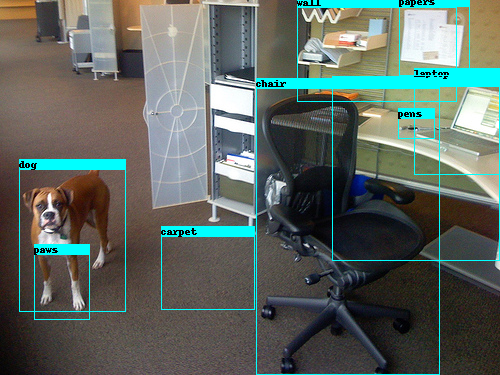

In [16]:
# Display the scene
%matplotlib notebook
random.seed(2019)
key = random.choice(images)
# key = "2376946"
image_name = key + ".jpg"
img = Image.open(os.path.join(IMAGE_PATH, image_name))

# Drawing the bouding boxes
draw = ImageDraw.Draw(img)
objects = train_scene[image_name.split(".")[0]]["objects"]
for okey in objects:
    x, y = objects[okey]["x"], objects[okey]["y"]
    w, h = objects[okey]["w"], objects[okey]["h"]
    name = objects[okey]["name"]
    draw.rectangle(((x, y), (x + w, y + h)), outline="cyan")
    draw.rectangle(((x, y-10), (x+ w, y)), fill="cyan")
    draw.text(xy=(x, y-10), text=name, fill="black")
display(img)

#img.save("./binary_samples/figures/scene_2.jpg")


In [17]:
for okey in objects:
    name = objects[okey]["name"]
    print(okey, name, objects[okey]["attributes"])

715318 carpet ['gray']
715315 desk []
715314 laptop ['silver']
715317 paws ['white']
715316 dog ['brown']
715313 chair ['black', 'empty']
715320 wall []
715321 papers []
715322 pens []


In [18]:
print(len(objects))

9


<IPython.core.display.Javascript object>


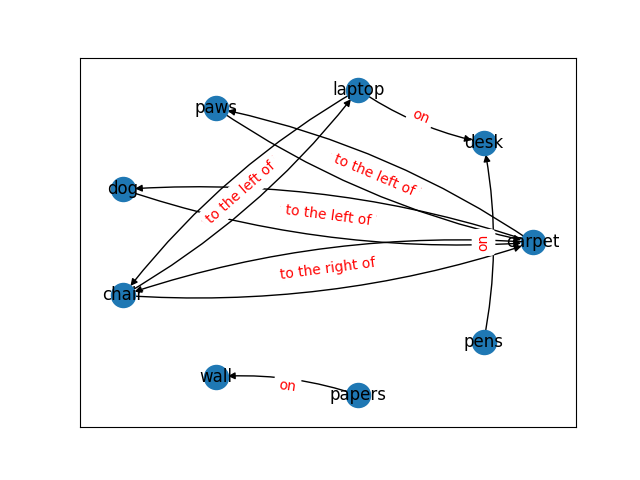

In [20]:
# Displaying the scene graph
node_labels = {}
edge_labels = {}
edges = []
for okey in objects:
    node_labels[okey] = objects[okey]["name"]
    for relation in objects[okey]["relations"]:
        edges.append((okey, relation["object"]))
        edge_labels[(okey, relation["object"])] = relation["name"]

%matplotlib notebook
G = nx.MultiDiGraph()
G.add_nodes_from(list(objects.keys()))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, labels=node_labels, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_color='red')
plt.show()
# plt.savefig("./binary_samples/figures/scene_graph_2.png")

In [21]:
# Filtering the questions pertaining to the chosen image

image_questions = dict(filter(lambda elem: elem[1]["imageId"] == image_name.split(".")[0], train_ques.items()))
                       
for q in image_questions:
    ques = image_questions[q]["question"]
    semString = image_questions[q]["semanticStr"]
    ans = image_questions[q]["answer"]
    print("{}\n{}\nAnswer: {}".format(ques, semString, ans))


Do you see any chairs there that are yellow?
select: chair (715313)->filter color: yellow [0]->exist: ? [1]
Answer: no
Does that chair look tan?
select: chair (715313)->verify color: tan [0]
Answer: no
The papers are on what?
select: papers (715321)->relate: _,on,o (715320) [0]->query: name [1]
Answer: wall
Are the pens on a desk?
select: pens (715322)->verify rel: desk,on,o (715315) [0]
Answer: yes
How does the carpet look, gray or red?
select: carpet (715318)->choose color: gray|red [0]
Answer: gray
Which kind of furniture is empty?
select: furniture (715313)->filter: empty [0]->query: name [1]
Answer: chair
Are there either black laptops or mobile phones?
select: laptop (715314)->filter color: black [0]->exist: ? [1]->select: cell phones (-) ->filter color: black [3]->exist: ? [4]->or:  [2, 5]
Answer: no
What item of furniture are the pens on, a desk or a bookcase?
select: pens (715322)->relate: furniture,on,o (715315) [0]->choose name: desk|bookcase [1]
Answer: desk
Is the chair to